In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("C:\\Users\\13764\\Documents\\ACADEMICS\\sr\\spring 2024\\physics intern\\matec shear\\Shear Moduli - ds growth.csv")
data

,cube,side,polarization,date,T_file (C),T (K),T (maybe actual?) (C),t1,t2,Experimental time (10 ns),Experimental time (us)
0,8-23-22 ds,top,C fast,5-27-24,20.0,293.15,22.5,201.0,2690.0,2489.0,24.890000
1,8-23-22 ds,top,C fast,5-27-24,30.0,303.15,28.1,201.0,2693.0,2492.0,24.920000
2,8-23-22 ds,top,C fast,5-27-24,50.0,323.15,42.1,201.0,2701.0,2500.0,25.000000
3,8-23-22 ds,top,C fast,5-27-24,70.0,343.15,57.9,201.0,2712.0,2511.0,25.110000
4,8-23-22 ds,top,C fast,5-27-24,85.0,358.15,69.3,201.0,2719.0,2518.0,25.180000
5,8-23-22 ds,top,C fast,5-27-24,100.0,373.15,82.2,201.0,2747.0,2546.0,25.460000
6,8-23-22 ds,top,C fast,5-27-24,110.0,383.15,92.4,201.0,2759.0,2558.0,25.580000
7,8-23-22 ds,top,C fast,5-27-24,125.0,398.15,105.2,201.0,2767.0,2566.0,25.660000
8,8-23-22 ds,top,C fast,5-27-24,135.0,408.15,115.5,201.0,2773.0,2572.0,25.720000
9,8-23-22 ds,top,C fast,5-27-24,150.0,423.15,131.0,201.0,2785.0,2584.0,25.840000


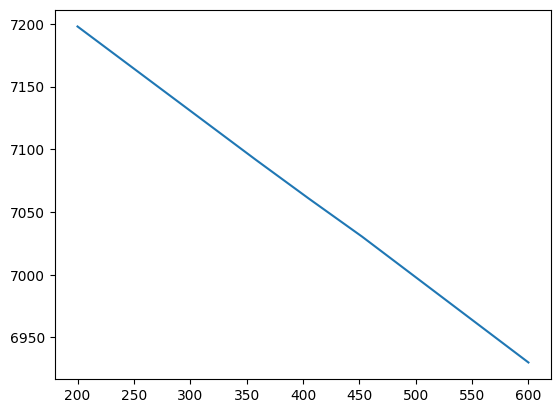

In [93]:
densities_data = [[295,7134], [350,7097], [400,7064], [450,7032], [500,6998]]

def find_density(T, densities = densities_data):
    if T < densities[0][0]:
            rho = densities[0][1] + (densities[1][1] - densities[0][1]) / (densities[1][0] - densities[0][0]) * (T - densities[0][0])
    elif T >= densities[-1][0]:
            rho = densities[-1][1] + (densities[-1][1] - densities[-2][1]) / (densities[-1][0] - densities[-2][0]) * (T - densities[-1][0])
    else:
        for i in range(0, len(densities)):
            if T >= densities[i][0]:
                rho = densities[i][1] + (densities[i+1][1] - densities[i][1]) / (densities[i+1][0] - densities[i][0]) * (T - densities[i][0])
    return rho

x = np.linspace(200, 600, 600)
Y = []
for X in x:
     Y.append(find_density(X))
plt.plot(x, Y)
plt.show()

In [94]:
def compute_modulus(data):
    data['density'] = data.apply(lambda row: find_density(row['T (K)']) if pd.notna(row['T (K)']) else row['density'], axis=1)

    #data['density'] = data['T (K)'].apply(find_density)
    data['distance'] = 69.8e-3
    data['corrected_distance'] = data['distance'] * ((data['density'] / 7133.327273) ** (-1/3))
    data['speed'] = data['corrected_distance'] / data['Experimental time (us)'] * 1e6
    data['shear modulus (GPa)'] = data.apply(lambda row: row['speed'] ** 2 * row['density'] / 1e9 if pd.notna(row['speed']) and pd.notna(row['density']) else row['G_exp (GPa)'], axis=1)
    #data['speed'] ** 2 * data['density'] / 1e9
    return data
data = compute_modulus(data)
data


,cube,side,polarization,date,T_file (C),T (K),T (maybe actual?) (C),t1,t2,Experimental time (10 ns),Experimental time (us),density,distance,corrected_distance,speed,shear modulus (GPa)
0,8-23-22 ds,top,C fast,5-27-24,20.0,293.15,22.5,201.0,2690.0,2489.0,24.890000,7135.244545,0.0698,0.069794,2804.087890,56.103778
1,8-23-22 ds,top,C fast,5-27-24,30.0,303.15,28.1,201.0,2693.0,2492.0,24.920000,7128.517273,0.0698,0.069816,2801.592928,55.951183
2,8-23-22 ds,top,C fast,5-27-24,50.0,323.15,42.1,201.0,2701.0,2500.0,25.000000,7115.062727,0.0698,0.069860,2794.387004,55.558670
3,8-23-22 ds,top,C fast,5-27-24,70.0,343.15,57.9,201.0,2712.0,2511.0,25.110000,7101.608182,0.0698,0.069904,2783.901451,55.038225
4,8-23-22 ds,top,C fast,5-27-24,85.0,358.15,69.3,201.0,2719.0,2518.0,25.180000,7091.621000,0.0698,0.069937,2777.464868,54.706971
5,8-23-22 ds,top,C fast,5-27-24,100.0,373.15,82.2,201.0,2747.0,2546.0,25.460000,7081.721000,0.0698,0.069969,2748.198736,53.485380
6,8-23-22 ds,top,C fast,5-27-24,110.0,383.15,92.4,201.0,2759.0,2558.0,25.580000,7075.121000,0.0698,0.069991,2736.156759,52.968274
7,8-23-22 ds,top,C fast,5-27-24,125.0,398.15,105.2,201.0,2767.0,2566.0,25.660000,7065.221000,0.0698,0.070024,2728.899678,52.613948
8,8-23-22 ds,top,C fast,5-27-24,135.0,408.15,115.5,201.0,2773.0,2572.0,25.720000,7058.784000,0.0698,0.070045,2723.360980,52.352848
9,8-23-22 ds,top,C fast,5-27-24,150.0,423.15,131.0,201.0,2785.0,2584.0,25.840000,7049.184000,0.0698,0.070077,2711.943772,51.844204


In [95]:
c66 = data[data['polarization'] == 'c66']
c44 = data[data['polarization'] == 'c44']

reuss = data[data['polarization'] == 'Reuss']
lab = data[data['cube'] != 'theoretical']

mask24 = lab['date'].str.contains("-24")
lab24 = lab[mask24]
mask23 = lab['date'].str.contains("-23")
lab23 = lab[mask23]
maskA = lab['polarization'].str.contains("A")
labA = lab[maskA]
maskB = lab['polarization'].str.contains("B")
labB = lab[maskB]
maskAg = lab['polarization'].str.contains("Ag")
labAg = lab[maskAg]
maskFast = lab['polarization'].str.contains("fast")
labFast = lab[maskFast]
maskSlow = lab['polarization'].str.contains("slow")
labSlow = lab[maskSlow]


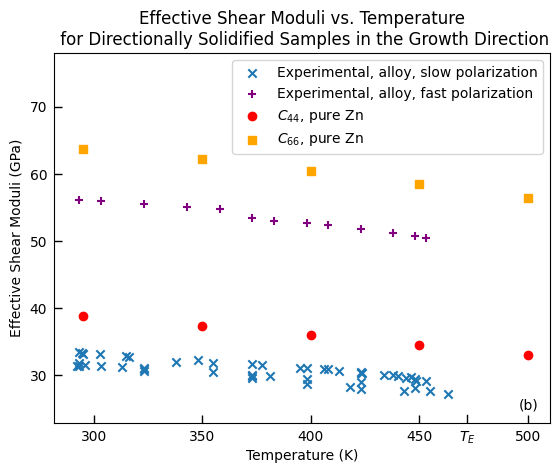

In [106]:
plt.scatter(labSlow['T (K)'], labSlow['shear modulus (GPa)'], label='Experimental, alloy, slow polarization', marker='x')

plt.scatter(labFast['T (K)'], labFast['shear modulus (GPa)'], label='Experimental, alloy, fast polarization', marker='+', c='purple')
#plt.scatter(lab24['T (K)'], lab24['shear modulus (GPa)'], s=7,label='Experimental 2024')
#plt.scatter(lab23['T (K)'], lab23['shear modulus (GPa)'], s=7,c='g', label='Experimental 2023')

#plt.scatter(labA['T (K)'], labA['shear modulus (GPa)'], s=7,label='Experimental A')
#plt.scatter(labB['T (K)'], labB['shear modulus (GPa)'], s=7,c='g', label='Experimental B')
plt.scatter(c44['T (K)'], c44['shear modulus (GPa)'],  c='r', label = r'$C_{44}$, pure Zn')
plt.scatter(c66['T (K)'], c66['shear modulus (GPa)'], c='orange', label = r'$C_{66}$, pure Zn', marker='s')
plt.text(472.15, 22, r'$T_{E}$', va='top', ha='center')
plt.plot([472.15   , 472.15], [23, 24.1], color='black', linewidth=1)  # Adjust the length (-0.5) as needed

plt.ylim([23, 78])
plt.xlabel("Temperature (K)")
plt.ylabel("Effective Shear Moduli (GPa)")
plt.title("Effective Shear Moduli vs. Temperature\n for Directionally Solidified Samples in the Growth Direction")
plt.tick_params(axis='both', direction='in', length=6, width=1, colors='black', labelcolor='black', pad=5)
plt.text(505, 24.5, f'(b)', color='black', ha='right', va='bottom')

plt.legend(loc='upper right')
plt.annotate('eutectic: 472 K',
             xy=(472.15, 0),
             xytext=(472.15, 0 + 0.5),
             ha='center',
             arrowprops=dict(facecolor='black'))
plt.show()

In [97]:
data_fg = pd.read_csv("C:\\Users\\13764\\Documents\\ACADEMICS\\sr\\spring 2024\\physics intern\\matec shear\\Shear Moduli - fg.csv")
pd.set_option('display.max_rows', None)
data_fg.rename(columns={'Experimental t (us)': 'Experimental time (us)', 'rho': 'density'}, inplace=True)


# correct a mistake in the csv
mask1 = data_fg['date'] == '8-7-23'
data_fg['side'][mask1] = 'side 4'

data_fg

data_fg['density'] = data_fg['T (K)'].apply(find_density)
data_fg = compute_modulus(data_fg)
data_fg


C:\Users\13764\AppData\Local\Temp\ipykernel_72656\2983696746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fg['side'][mask1] = 'side 4'


,cube,side,date,T_file (C),T (K),T (maybe actual?) (C),t1,t2,t,Experimental time (us),Experimental t (s),distance (m),v (m/s),G_exp (GPa),density,distance,corrected_distance,speed,shear modulus (GPa)
0,1-20-23 fg,side 4,8-7-23,20.0,293.00,NaN,NaN,NaN,3140.0,31.40,0.000031,0.069793,2222.720337,35.252072,7135.345455,0.0698,0.069793,2222.720337,35.252072
1,theoretical,NaN,Reuss,NaN,295.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.107000,7134.000000,0.0698,0.069798,NaN,34.107000
2,theoretical,NaN,Voigt,NaN,295.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.806000,7134.000000,0.0698,0.069798,NaN,44.806000
3,1-20-23 fg,top,5-21-24,23.0,296.00,NaN,111.0,3253.0,3142.0,31.42,0.000031,0.069800,2221.514959,35.203888,7133.327273,0.0698,0.069800,2221.514959,35.203888
4,1-20-23 fg,top,5-21-24,45.0,318.00,NaN,111.0,3267.0,3156.0,31.56,0.000032,0.069848,2213.192009,34.868105,7118.527273,0.0698,0.069848,2213.192009,34.868105
5,1-20-23 fg,top,5-21-24,60.0,333.00,NaN,111.0,3280.0,3169.0,31.69,0.000032,0.069881,2205.155433,34.566268,7108.436364,0.0698,0.069881,2205.155433,34.566268
6,1-20-23 fg,side 4,8-7-23,76.0,349.00,NaN,NaN,NaN,3190.0,31.90,0.000032,0.069917,2191.745546,34.095435,7097.672727,0.0698,0.069917,2191.745546,34.095435
7,theoretical,NaN,Reuss,NaN,350.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.200200,7097.000000,0.0698,0.069919,NaN,33.200200
8,theoretical,NaN,Voigt,NaN,350.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.442000,7097.000000,0.0698,0.069919,NaN,43.442000
9,1-20-23 fg,top,5-21-24,80.0,353.00,NaN,111.0,3297.0,3186.0,31.86,0.000032,0.069925,2194.770730,34.176843,7095.020000,0.0698,0.069925,2194.770730,34.176843


In [98]:
voigt = data_fg[data_fg['date'] == 'Voigt']
#plt.scatter(c66['T (K)'], c66['Experimental time (us)'])

reuss = data_fg[data_fg['date'] == 'Reuss']

maskNormal = data_fg['cube'] != 'theoretical'
maskNormal2 = data_fg['cube'] != '6-3-24 fg pure Zn' #in ['theoretical', ]

lab_fg = data_fg[maskNormal]
lab_fg = lab_fg[maskNormal2]

pure_fg = data_fg[data_fg['cube'] == '6-3-24 fg pure Zn']


C:\Users\13764\AppData\Local\Temp\ipykernel_72656\3877291634.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lab_fg = lab_fg[maskNormal2]


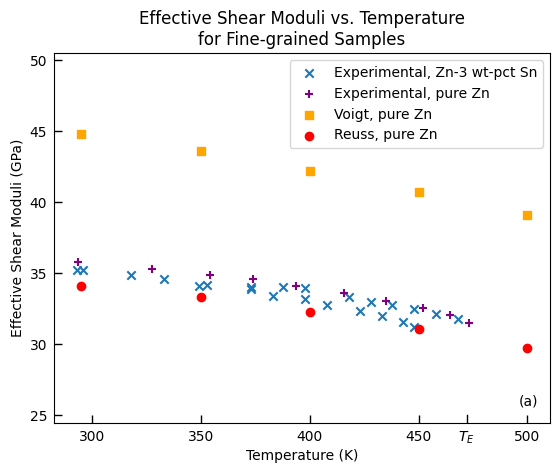

In [107]:
fig, ax = plt.subplots()

plt.scatter(lab_fg['T (K)'], lab_fg['shear modulus (GPa)'], label='Experimental, Zn-3 wt-pct Sn', marker = 'x')

plt.scatter(pure_fg['T (K)'], pure_fg['shear modulus (GPa)'], c='purple', label='Experimental, pure Zn', marker = '+')

#plt.scatter(lab24['T (K)'], lab24['shear modulus (GPa)'], s=7,label='Experimental 2024')
#plt.scatter(lab23['T (K)'], lab23['shear modulus (GPa)'], s=7,c='g', label='Experimental 2023')

#plt.scatter(labA['T (K)'], labA['shear modulus (GPa)'], s=7,label='Experimental A')
#plt.scatter(labB['T (K)'], labB['shear modulus (GPa)'], s=7,c='g', label='Experimental B')
plt.scatter(voigt['T (K)'], voigt['shear modulus (GPa)'], c='orange', label = 'Voigt, pure Zn', marker = 's')
plt.scatter(reuss['T (K)'], reuss['shear modulus (GPa)'], c='r', label = 'Reuss, pure Zn')
plt.tick_params(axis='both', direction='in', length=6, width=1, colors='black', labelcolor='black', pad=5)

plt.ylim([24.5, 50.5])
plt.xlabel("Temperature (K)")
plt.ylabel("Effective Shear Moduli (GPa)")
plt.title("Effective Shear Moduli vs. Temperature\nfor Fine-grained Samples")
plt.legend(loc='upper right')
"""plt.annotate('eutectic: 472 K',
             xy=(472.15, 25),
             xytext=(472.15, 25 + 0.5),
             ha='center',
             arrowprops=dict(facecolor='black'))"""
plt.text(472.15, 24, r'$T_{E}$', va='top', ha='center')
plt.plot([472.15   , 472.15], [24.5, 25], color='black', linewidth=1)  # Adjust the length (-0.5) as needed
plt.text(505, 25.5, f'(a)', color='black', ha='right', va='bottom')

plt.show()

In [100]:
data_t = pd.read_csv("C:\\Users\\13764\\Documents\\ACADEMICS\\sr\\spring 2024\\physics intern\\matec shear\\Shear Moduli - ds transverse.csv")
data_t = compute_modulus(data_t)
data_t

,cube,side,polarization,date,T (C),T_file (C),T (K),T (maybe actual?) (C),t1,t2,Experimental time (10 ns),Experimental time (us),density,distance,corrected_distance,speed,shear modulus (GPa)
0,8-23-22 ds,4.0,B mix,5-27-24,21.0,21.0,294.15,20.7,201.0,2976.0,2775.0,27.750000,7134.571818,0.0698,0.069796,2515.169051,45.133839
1,8-23-22 ds,4.0,B mix,5-27-24,30.0,30.0,303.15,33.6,201.0,2981.0,2780.0,27.800000,7128.517273,0.0698,0.069816,2511.355963,44.958908
2,8-23-22 ds,4.0,B mix,5-27-24,50.0,45.0,318.15,54.7,201.0,2992.0,2791.0,27.910000,7118.426364,0.0698,0.069849,2502.639551,44.584162
3,8-23-22 ds,4.0,B mix,5-27-24,70.0,64.0,337.15,73.6,201.0,3012.0,2811.0,28.110000,7105.644545,0.0698,0.069891,2486.322542,43.925672
4,8-23-22 ds,4.0,B mix,5-27-24,100.0,101.0,374.15,118.8,201.0,3057.0,2856.0,28.560000,7081.061000,0.0698,0.069971,2449.975967,42.503235
5,8-23-22 ds,4.0,B mix,5-27-24,110.0,110.0,383.15,124.3,201.0,3065.0,2864.0,28.640000,7075.121000,0.0698,0.069991,2443.815988,42.254296
6,8-23-22 ds,4.0,B mix,5-27-24,120.0,120.0,393.15,135.0,201.0,3073.0,2872.0,28.720000,7068.521000,0.0698,0.070013,2437.766957,42.006154
7,8-23-22 ds,4.0,B mix,5-27-24,130.0,130.0,403.15,145.1,201.0,3081.0,2880.0,28.800000,7061.984000,0.0698,0.070034,2431.745243,41.760230
8,8-23-22 ds,4.0,B mix,5-27-24,140.0,139.0,412.15,152.7,201.0,3087.0,2886.0,28.860000,7056.224000,0.0698,0.070053,2427.349763,41.575461
9,theoretical,NaN,Reuss,NaN,NaN,NaN,295.00,NaN,NaN,NaN,NaN,31.922735,7134.000000,0.0698,0.069798,2186.460732,34.104876


In [101]:
voigt = data_t[data_t['polarization'] == 'Voigt']
#plt.scatter(c66['T (K)'], c66['Experimental time (us)'])

reuss = data_t[data_t['polarization'] == 'Reuss']

lab_t = data_t[data_t['cube'] != 'theoretical']

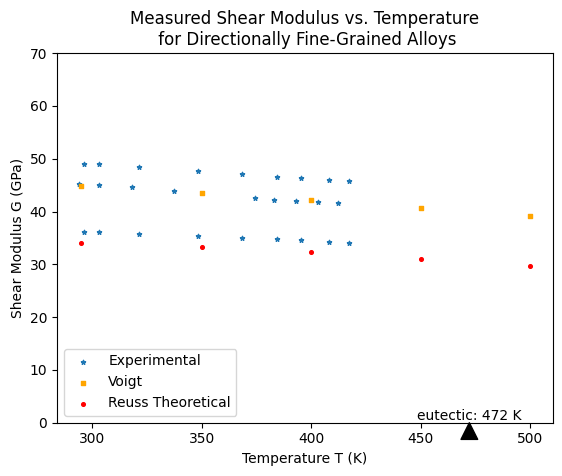

In [102]:
plt.scatter(lab_t['T (K)'], lab_t['shear modulus (GPa)'], s=10,label='Experimental', marker = '*')
#plt.scatter(lab24['T (K)'], lab24['shear modulus (GPa)'], s=7,label='Experimental 2024')
#plt.scatter(lab23['T (K)'], lab23['shear modulus (GPa)'], s=7,c='g', label='Experimental 2023')

#plt.scatter(labA['T (K)'], labA['shear modulus (GPa)'], s=7,label='Experimental A')
#plt.scatter(labB['T (K)'], labB['shear modulus (GPa)'], s=7,c='g', label='Experimental B')
plt.scatter(voigt['T (K)'], voigt['shear modulus (GPa)'], s=10, c='orange', label = 'Voigt', marker = 's')
plt.scatter(reuss['T (K)'], reuss['shear modulus (GPa)'], s=7,c='r', label = 'Reuss Theoretical')

plt.ylim([0, 70])
plt.xlabel("Temperature T (K)")
plt.ylabel("Shear Modulus G (GPa)")
plt.title("Measured Shear Modulus vs. Temperature\n for Directionally Fine-Grained Alloys")
plt.legend(loc='lower left')
plt.annotate('eutectic: 472 K',
             xy=(472.15, 0),
             xytext=(472.15, 0 + 0.5),
             ha='center',
             arrowprops=dict(facecolor='black'))
plt.show()